In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import math
os.getcwd()

'/mnt/c/Users/feder/Documents/GitHub/ia-uncuyo-2023/tp5-busquedas-locales'

In [105]:
df = pd.read_pickle('code/results2.pkl')
#df['seconds'] = df['nanos']
#df = df.drop(columns=['nanos'])
agent_param_list = ['t', 'd','p_size','pop_F','cross_F','mut_F','mut','gen' ]
# index = [
#     't', 'd','p_size','pop_F','cross_F','mut_F','mut','gen'
# ]
# df['agent_params'] = df['agent_params'].map(lambda h_map: " ".join([f"{k}:{v:8.3f}" for k, v in sorted(h_map.items(), key=lambda x: index.index(x[0]))]))
unmarshaled_columns = df['agent_params'].apply(lambda x: pd.Series(x))
df = pd.concat([df, unmarshaled_columns], axis=1)
df = df.drop(columns=['agent_params'])
df['solved'] = df['score'] == 0
df['solved'] = df['solved'].astype(int)
# Set type to bool
def map_func_ver(x):
	if x == 0.0: return 'basic'
	elif x == 1.0: return 'permut-aware'
	elif x == 2.0: return 'permut-double'
	elif math.isnan(x): return ''
	else:
		raise Exception(f"Unknown value {x}")

def map_float_stirng(x):
	if math.isnan(x): return ''
	return str(x)
df['pop_F'] = df['pop_F'].map(map_func_ver)
df['cross_F'] = df['cross_F'].map(map_func_ver)
df['mut_F'] = df['mut_F'].map(map_func_ver)
df['d'] = df['d'].map(map_float_stirng)
df['t'] = df['t'].map(map_float_stirng)
df['mut'] = df['mut'].map(map_float_stirng)
df['gen'] = df['gen'].map(map_float_stirng)
df['p_size'] = df['p_size'].map(map_float_stirng)
# df[:400]
df[:400]

,agent,size,score,visited,seconds,result,run,d,t,pop_F,cross_F,mut_F,mut,gen,p_size,solved
0,hill_climbing,4,1,30,2.633597,"[0, 3, 1, 2]",0,,,,,,,,,0
1,hill_climbing,4,0,30,2.639763,"[2, 0, 3, 1]",1,,,,,,,,,1
2,hill_climbing,4,2,30,2.632277,"[3, 0, 0, 1]",2,,,,,,,,,0
3,hill_climbing,4,2,30,2.624164,"[0, 1, 3, 0]",3,,,,,,,,,0
4,hill_climbing,4,2,30,2.643357,"[3, 1, 3, 2]",4,,,,,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,simulated_annealing,4,2,3,0.000228,"[1, 1, 3, 0]",11,0.9,50.0,,,,,,,0
396,simulated_annealing,4,4,76,0.002029,"[3, 1, 2, 3]",12,0.9,50.0,,,,,,,0
397,simulated_annealing,4,3,16,0.000691,"[2, 1, 1, 0]",13,0.9,50.0,,,,,,,0
398,simulated_annealing,4,3,1,0.000273,"[0, 0, 1, 3]",14,0.9,50.0,,,,,,,0


In [106]:
# Sort df by agent then agent_params
df.groupby(by=['agent', *agent_param_list], dropna=False, sort=True, group_keys=False).agg({'solved': ['mean']})

solved
                                                                                             mean
agent               t     d     p_size pop_F        cross_F      mut_F        mut gen            
genetic_algorithm               1000.0 basic        basic        basic        0.1 100.0  0.328125
                                                                              0.5 100.0  0.461806
                                                                 permut-aware 0.1 100.0  0.290799
                                                                              0.5 100.0  0.383681
                                                    permut-aware basic        0.1 100.0  0.822917
                                                                              0.5 100.0  0.877604
                                                                 permut-aware 0.1 100.0  0.855903
                                                                              0.5 100.0  0.916667
                                       permut-aware basic        basic        0.1 100.0  0.358507
                                                                              0.5 100.0  0.469618
                                                                 permut-aware 0.1 100.0  0.417535
                                                                              0.5 100.0  0.584201
                                                    permut-aware basic        0.1 100.0  0.677083
                                                                              0.5 100.0  0.751736
                                                                 permut-aware 0.1 100.0  0.698785
                                                                              0.5 100.0  0.740451
                                50.0   basic        basic        basic        0.1 100.0  0.172743
                                                                              0.5 100.0  0.273438
                                                                 permut-aware 0.1 100.0  0.123264
                                                                              0.5 100.0  0.150174
                                                    permut-aware basic        0.1 100.0  0.747396
                                                                              0.5 100.0  0.779514
                                                                 permut-aware 0.1 100.0  0.739583
                                                                              0.5 100.0  0.743924
                                       permut-aware basic        basic        0.1 100.0  0.159722
                                                                              0.5 100.0  0.269097
                                                                 permut-aware 0.1 100.0  0.238715
                                                                              0.5 100.0  0.301215
                                                    permut-aware basic        0.1 100.0  0.583333
                                                                              0.5 100.0  0.703125
                                                                 permut-aware 0.1 100.0  0.509549
                                                                              0.5 100.0  0.565972
hill_climbing                                                                            0.008681
simulated_annealing 100.0 0.1                                                            0.000000
                          0.5                                                            0.001736
                          0.9                                                            0.000000
                          0.99                                                           0.000000
                          0.999                                                          0.000000
                    50.0  0.1                                            

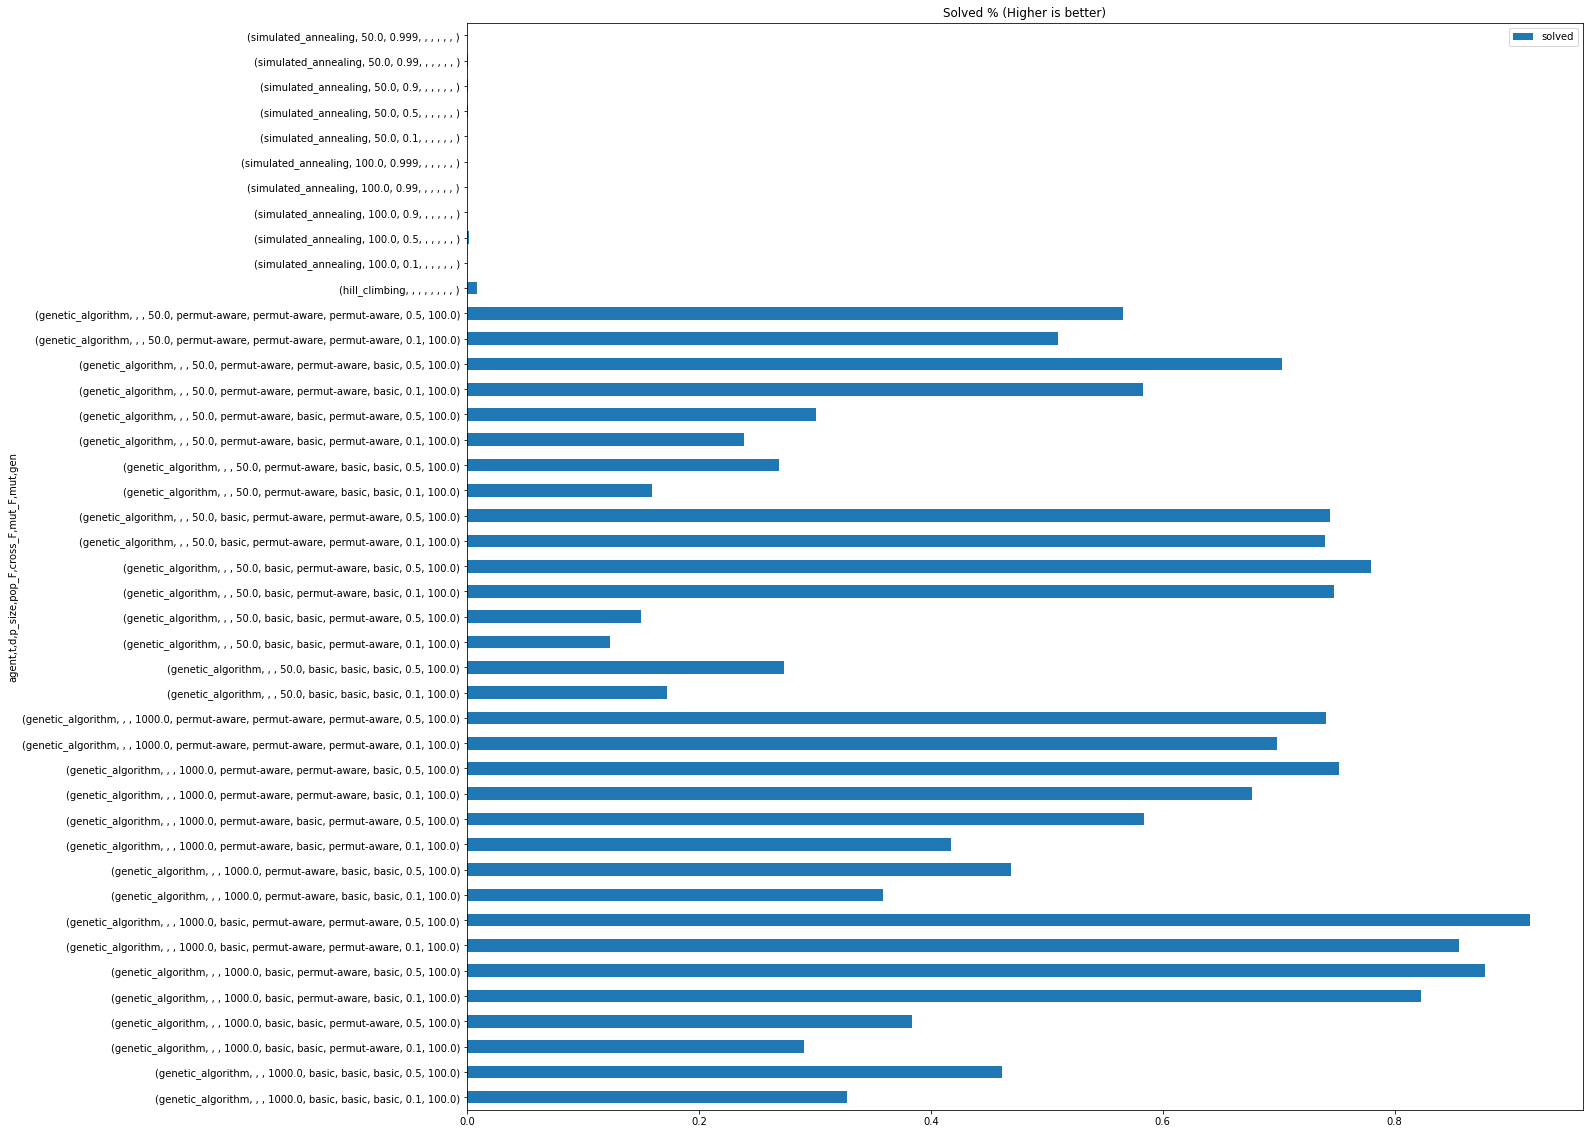

In [107]:
%matplotlib inline
# If mean(solved) == 1 always, then say 'Always solved'
# If mean(solved) == 0 always, then say 'Never solved'
# otherwise 'Sometimes solved'
df.groupby(['agent', *agent_param_list], dropna=False, sort=True, group_keys=False).agg({'solved': 'mean'}).plot(kind="barh", title="Solved % (Higher is better)", figsize=(20,20))


# df.plot(kind="box", by=['agent', *agent_param_list], column=['score'], title="Score (Lower is better)", figsize=(20,10), rot=90)
#df.plot(kind="box", by=['agent', *agent_param_list], column=['score'], logy=True, title="Log score (Lower is better)", figsize=(20,10), rot=90)
None

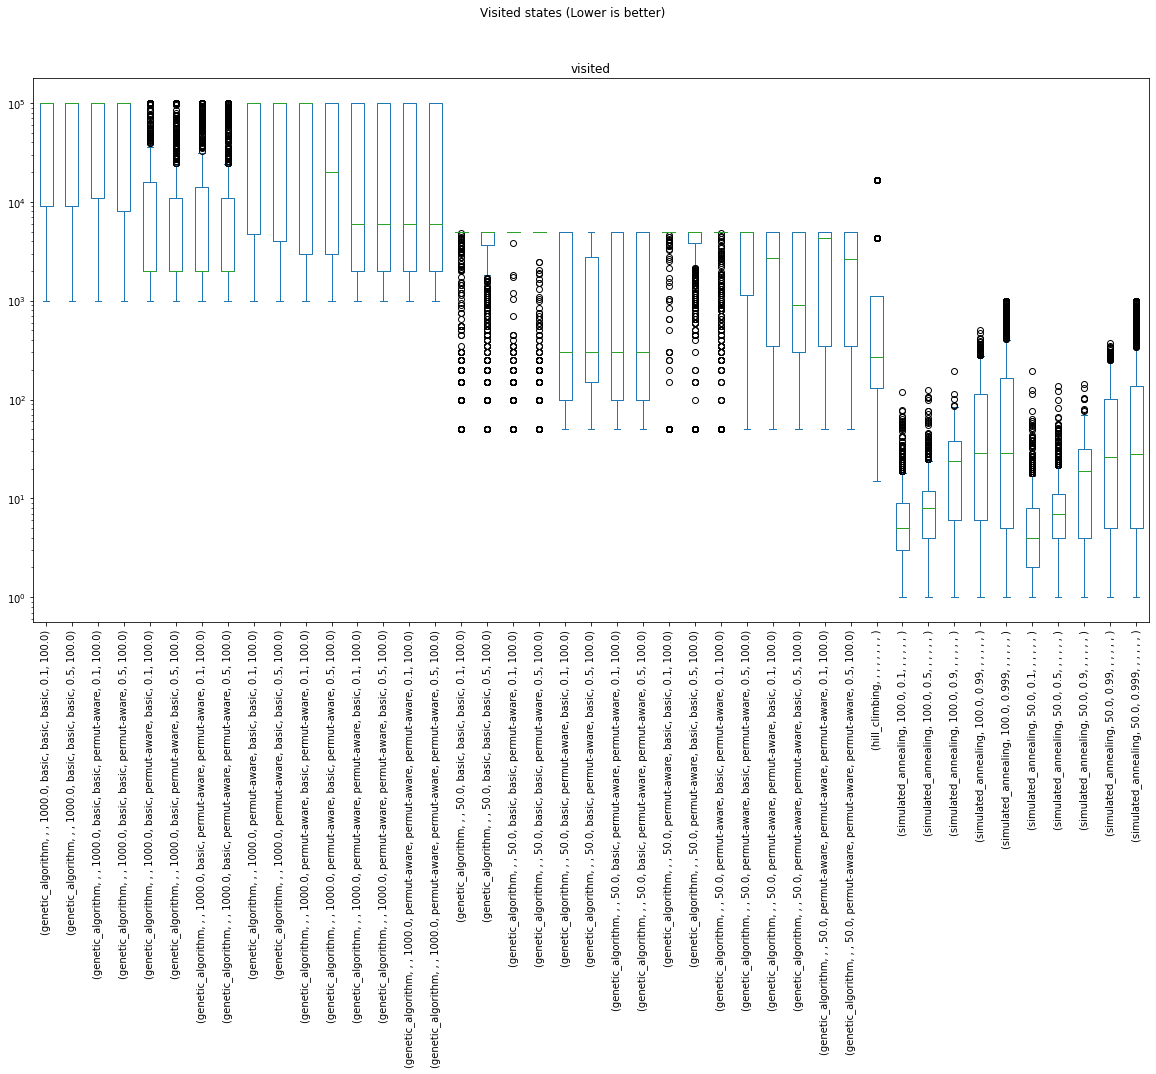

In [109]:
df.plot(kind="box", by=['agent', *agent_param_list], column=['visited'], logy=True, title="Visited states (Lower is better)", rot=90, figsize=(20,10))
None

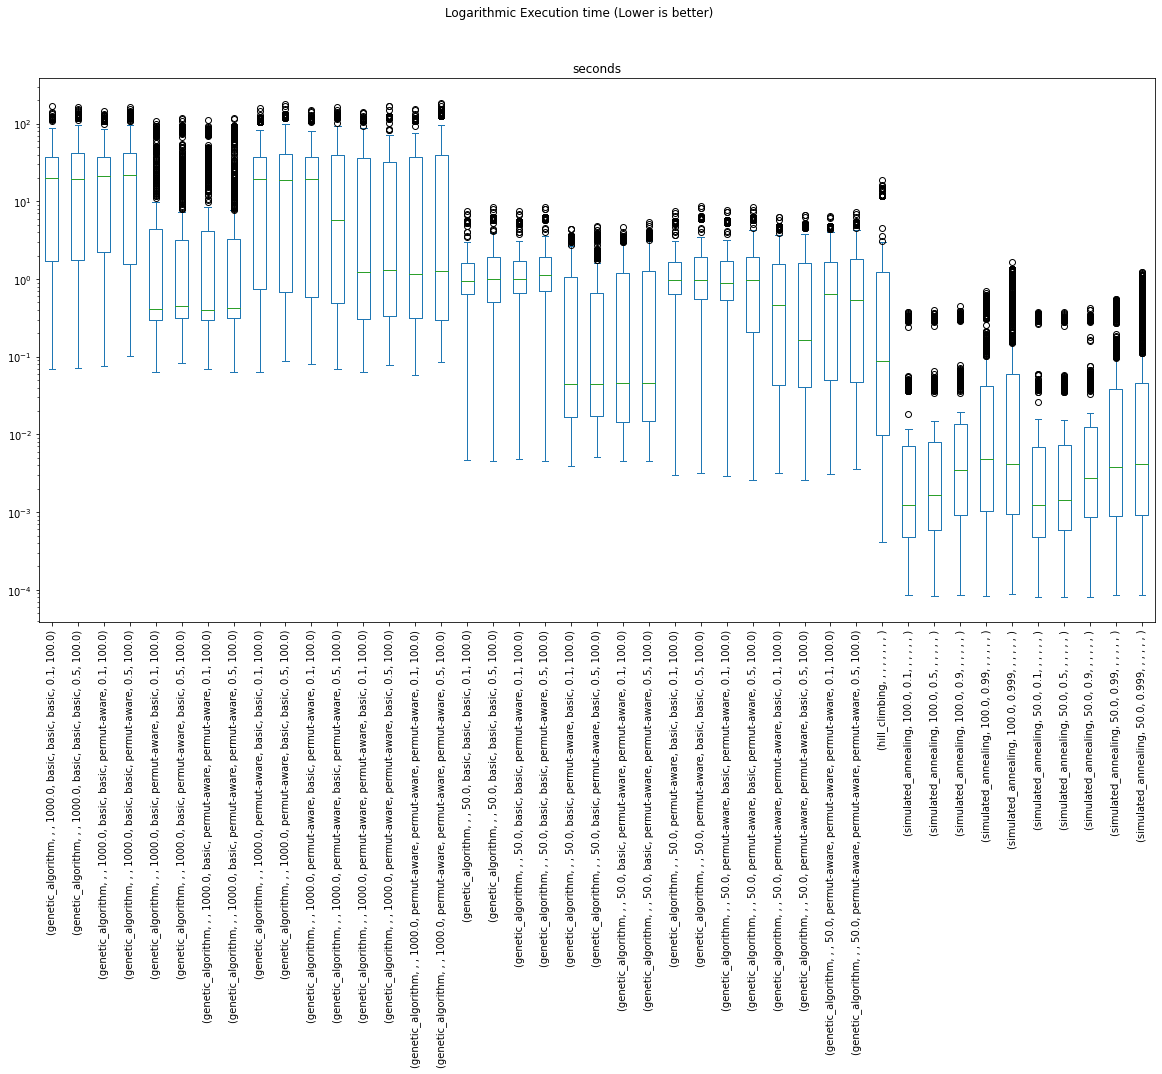

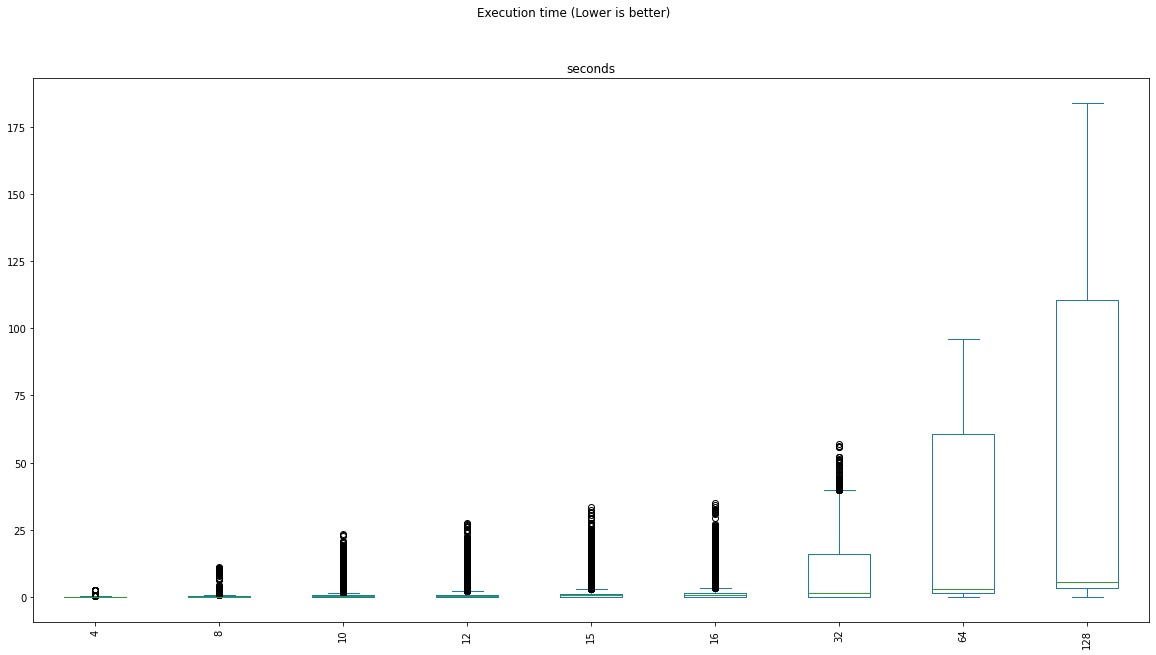

In [110]:
df.plot(kind="box", by=['agent', *agent_param_list], column=['seconds'], logy=True, title="Logarithmic Execution time (Lower is better)", rot=90, figsize=(20,10))
df.plot(kind="box", by=['size'], column=['seconds'], logy=False, title="Execution time (Lower is better)", rot=90, figsize=(20,10))
None

In [120]:
print(df[['agent','result']].to_csv())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

